# RED WINE QUALITY RESEARCH

## 1. Reading the data and exploratory data analysis

<font size="3"> 
    This datasets is related to red variants of the Portuguese "Vinho Verde" wine.
    <br>The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).
 

</font>

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [207]:
dataset = pd.read_csv('winequality-red.csv')

In [208]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [209]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<font size="3"> 
    
<br> 1. Fixed acidity. The predominant fixed acids in wine, such as tartaric, succinic, citric, and malic acids.
<br> 2. Volatile acidity. The high acetic acid present in wine, which causes an unpleasant vinegar taste.
<br> 3. Citric acid. A weak organic acid used to increase the freshness and flavor of wine.
<br> 4. Residual sugar. The amount of sugar left after fermentation.
<br> 5. Chlorides. The amount of salt in wine. The lower chloride rate creates better quality wines.
<br> 6. Free sulfur dioxide. SO2 is used for preventing wine from oxidation and microbial spoilage.
<br> 7. Total sulfur dioxide. The amount of free and bound forms of SO2.
<br> 8. Density. Depends on the alcohol and sugar content. Better wines usually have lower densities.
<br> 9. pH. Used to check the level of acidity or alkalinity of wine.
<br> 10. Sulfates. An antibacterial and antioxidant agent added to wine.
<br> 11. Alcohol. The percentage of alcohol in wine. A higher concentration leads to better quality.

</font>



<font size="3"> 
    Here we can see our dataset contains 12 columns, first 11 columns are the features and the last column quality is the target.
<br>
</font>


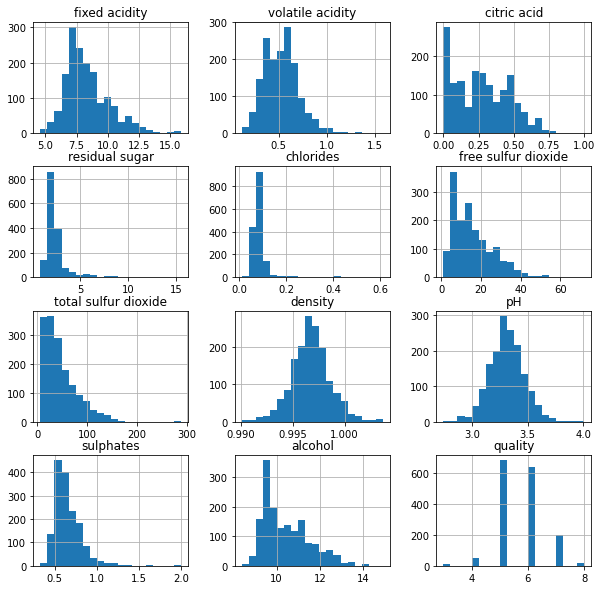

In [210]:
dataset.hist(bins=20, figsize=(10, 10))
plt.show()

<font size="3"> 
    Here we can see the visualization of this distribution of value of each feature and the pattern.
<br>
</font>


#### Distribution of target 'quality'

<AxesSubplot:xlabel='quality', ylabel='count'>

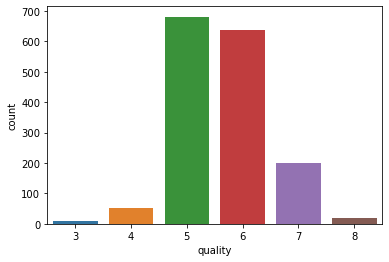

In [211]:
sb.countplot(dataset['quality'])

#### Bar plot
<font size="3">
    A barplot shows the relationship between a numeric and a categoric variable.
<font>
    

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

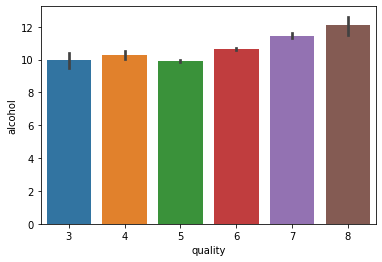

In [212]:
sb.barplot(dataset['quality'], dataset['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='pH'>

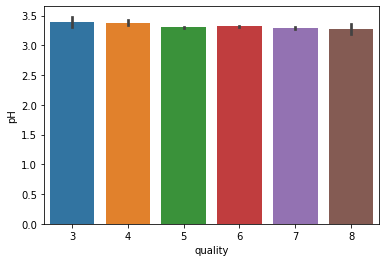

In [213]:
sb.barplot(dataset['quality'], dataset['pH'])

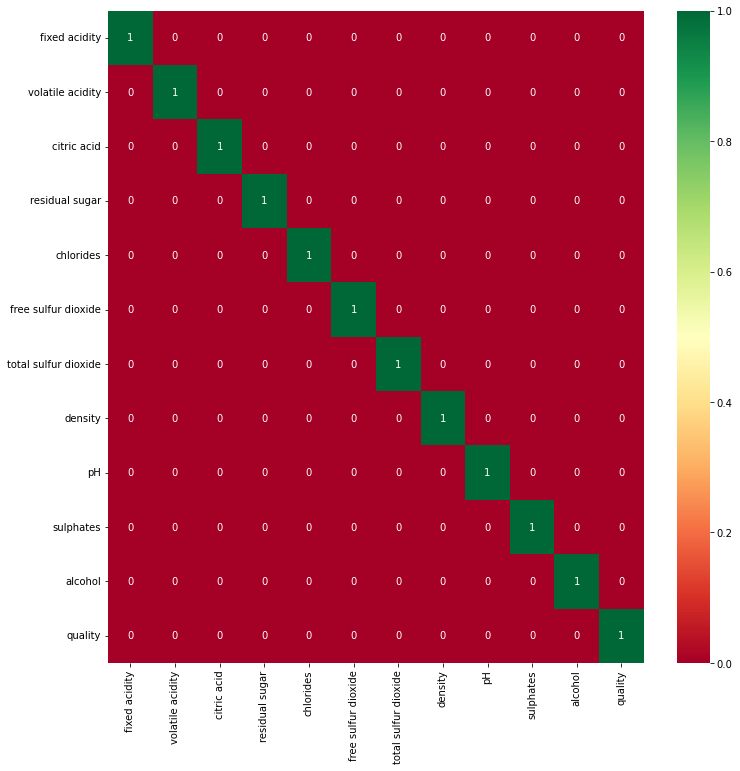

In [214]:
#Heat map for highly correlated features
plt.figure(figsize=(12,12))
sb.heatmap(dataset.corr() > 0.7, annot=True, cmap="RdYlGn")
plt.show()

<font size="3"> 
    Here we can see that none of these features are correlated
<br>
</font>

In [215]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Processing the data

<font size="3"> 
    Here I want to make this problem is classification task, so the target "quality", I will try to make it into a column with only two value "good" or "bad".
<br>
</font>


In [216]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [217]:
import warnings
warnings.filterwarnings('ignore')

In [218]:
#Making binary classification for "quality"
#Casting the column quality by float value
dataset['quality'] = dataset['quality'].astype(float)
bins = [2, 6.5, 8]
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)


In [219]:
dataset['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [220]:
#labeling for the quality colum, 0 for bad quality, 1 for good quality
label = LabelEncoder()
dataset['quality'] = label.fit_transform(dataset['quality'])

In [221]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [222]:
#Seperate the dataset as feature and target
dataset_value = dataset.values
feature = dataset_value[:, :-1]
target = dataset_value[:, -1]

In [223]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1119, 11) (1119,) (480, 11) (480,)


In [224]:
#Applying some transformation on the dataset using Standard scaling to get optimized result
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

In [225]:
X_train

array([[ 1.72830746, -0.94739106,  2.04627852, ..., -0.73807619,
        -0.71883551,  1.36156659],
       [-0.33533406,  0.17059533, -0.34573993, ...,  1.06789048,
        -0.20280497, -1.05084572],
       [ 0.75381007,  0.05879669,  0.79826889, ..., -0.73807619,
         0.31322556,  0.89764115],
       ...,
       [-0.27801069,  1.59602797, -1.33374755, ...,  0.42290238,
        -0.20280497,  0.34093061],
       [ 1.72830746, -0.94739106,  2.04627852, ..., -0.73807619,
        -0.71883551,  1.36156659],
       [ 0.12325294, -1.05918969,  0.9022697 , ...,  1.32588572,
        -0.14546824,  0.24814553]])

## 3. Training:

In [226]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [227]:
#To identify the best combination of parameter values for the model, I used GridSearchCV
def find_best_params(base_estimator, param_grid, X_train, y_train, X_test, y_test):
    clf = GridSearchCV(base_estimator, param_grid, cv=5).fit(X_train, y_train)
    print("The best parameters are %s" % (clf.best_params_))
    print("Accuracy score for testing data: ", clf.score(X_test, y_test))
    y_predicted = clf.predict(X_test)
    print("f1 score for testing data: ", f1_score(y_test, y_predicted, average='macro'))
    best_estimator = clf.best_estimator_
    return clf, best_estimator
    


<font size="3"> 
Limitation of GridSearchCV:
<br> The search can only test the parameters that you fed into "param_grid". There could be a combination of parameters that further improves the performance of the model (We miss some better combination of parameters). 
<br> => So why not just include more values for each parameter???
<br>Since conducting an exhaustive search of all the parameters is an incredibly time-consuming task.
    
</font>

### 3.1. Logistic Regression:

In [228]:
%pip install scikit-plot

In [229]:
from sklearn.linear_model import LogisticRegression
import scikitplot

In [230]:
#Training using general Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       413
         1.0       0.61      0.37      0.46        67

    accuracy                           0.88       480
   macro avg       0.76      0.67      0.70       480
weighted avg       0.86      0.88      0.87       480



<font size="3"> 
Finding best parameters
<br>
</font>

In [231]:
#Training data using Logistic regression
param_grid = {'C': np.logspace(-4, 4, 20),
              'l1_ratio': np.linspace(0, 1, 11),
              'penalty': ['elasticnet']
             }
logistic_regression = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
#Here we can find a best estimator with given parameter grid
clf, best_estimator_lg = find_best_params(logistic_regression, param_grid, X_train, y_train, X_test, y_test)

The best parameters are {'C': 0.08858667904100823, 'l1_ratio': 0.0, 'penalty': 'elasticnet'}
Accuracy score for testing data:  0.8854166666666666
f1 score for testing data:  0.6957088025449809


In [232]:
#Parameters of GridSearchCV
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [233]:
best_estimator_lg

LogisticRegression(C=0.08858667904100823, l1_ratio=0.0, max_iter=500,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga', tol=0.001)

In [234]:
#Accuracy score and f1 score using best estimator
best_pred_y = best_estimator_lg.predict(X_test)
print("Accuracy score for testing data: ", accuracy_score(y_test, best_pred_y))
print("f1 score for testing data: ", f1_score(y_test, best_pred_y, average='macro'))
print(classification_report(y_test, best_pred_y))


Accuracy score for testing data:  0.8854166666666666
f1 score for testing data:  0.6957088025449809
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94       413
         1.0       0.68      0.34      0.46        67

    accuracy                           0.89       480
   macro avg       0.79      0.66      0.70       480
weighted avg       0.87      0.89      0.87       480



<font size="3"> 
    => These scores are exactly the same with what we get using GridSearchcv
</font>

#### Plot the ROC curve


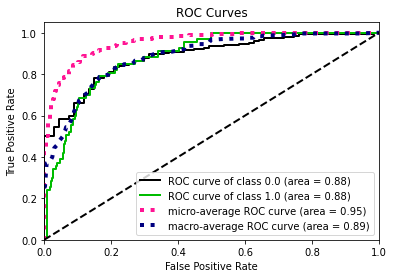

In [235]:
predicted_proba = best_estimator_lg.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

<font size="3"> 
A Receiver Operator Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of binary classifiers.
</font>

#### Score for Logistic Regression (best estimator) with different sizes


In [236]:
best_estimator_lg

LogisticRegression(C=0.08858667904100823, l1_ratio=0.0, max_iter=500,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga', tol=0.001)

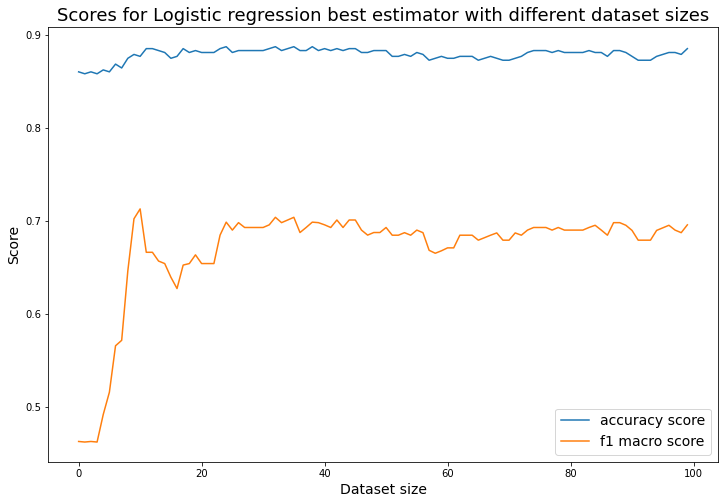

In [237]:
acc_test_score = np.zeros(100)
f1_macro_test_score = np.zeros(100)

for i in range(100):
    dataset_size = int(X_train.shape[0] * (i + 1) / 100)
    clf1 = best_estimator_lg.fit(X_train[:dataset_size], y_train[:dataset_size])
    acc_test_score[i] = clf1.score(X_test, y_test)
    y_predicted = clf1.predict(X_test)
    f1_macro_test_score[i] = f1_score(y_test, y_predicted, average='macro')

plt.figure(figsize=(12, 8))
plt.plot(np.arange(100), acc_test_score, label='accuracy score')
plt.plot(np.arange(100), f1_macro_test_score, label='f1 macro score')

plt.xlabel("Dataset size", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend(fontsize=14)
plt.title("Scores for Logistic regression best estimator with different dataset sizes", fontsize=18)
plt.show()

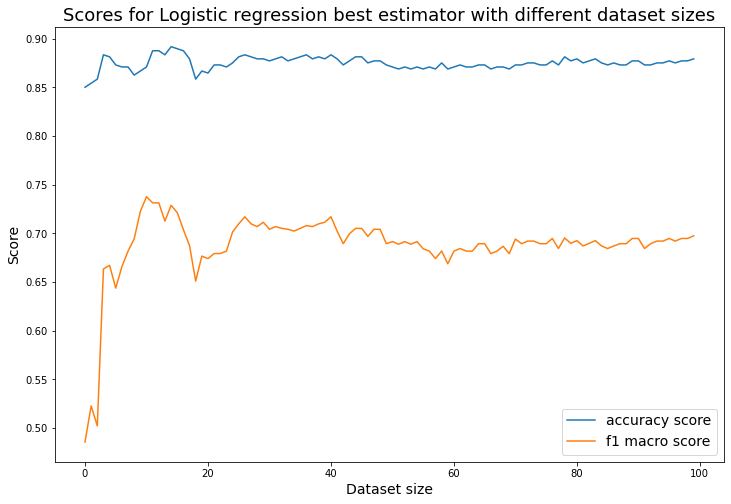

In [238]:
acc_test_score = np.zeros(100)
f1_macro_test_score = np.zeros(100)
estimator = LogisticRegression()
for i in range(100):
    dataset_size = int(X_train.shape[0] * (i + 1) / 100)
    clf2 = estimator.fit(X_train[:dataset_size], y_train[:dataset_size])
    acc_test_score[i] = clf2.score(X_test, y_test)
    y_predicted = clf2.predict(X_test)
    f1_macro_test_score[i] = f1_score(y_test, y_predicted, average='macro')

plt.figure(figsize=(12, 8))
plt.plot(np.arange(100), acc_test_score, label='accuracy score')
plt.plot(np.arange(100), f1_macro_test_score, label='f1 macro score')

plt.xlabel("Dataset size", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend(fontsize=14)
plt.title("Scores for Logistic regression best estimator with different dataset sizes", fontsize=18)
plt.show()

<font size="3"> 
=> Using best estimator, the accuracy line is more stable and f1 score is increasing with respect to the size of trainning data
</font>

### 3.2. Decision Tree:

In [239]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [240]:
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid_2 = {'max_depth': np.linspace(1, 32, 32, dtype=np.int16),
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion': ["gini", "entropy"]}

clf, best_estimator = find_best_params(decision_tree, param_grid_2, X_train, y_train, X_test, y_test)

The best parameters are {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}
Accuracy score for testing data:  0.88125
f1 score for testing data:  0.7226024272287617


In [241]:
y_pred_tree = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       413
         1.0       0.60      0.45      0.51        67

    accuracy                           0.88       480
   macro avg       0.76      0.70      0.72       480
weighted avg       0.87      0.88      0.87       480



#### Plot the tree of best estimator

[Text(197.83636363636364, 199.32, 'X[10] <= 1.037\ngini = 0.232\nsamples = 1119\nvalue = [969, 150]'),
 Text(111.60000000000001, 163.07999999999998, 'X[1] <= -0.752\ngini = 0.141\nsamples = 941\nvalue = [869, 72]'),
 Text(50.727272727272734, 126.83999999999999, 'X[10] <= 0.109\ngini = 0.358\nsamples = 197\nvalue = [151, 46]'),
 Text(20.290909090909093, 90.6, 'X[9] <= 0.199\ngini = 0.175\nsamples = 103\nvalue = [93, 10]'),
 Text(10.145454545454546, 54.359999999999985, 'gini = 0.0\nsamples = 55\nvalue = [55, 0]'),
 Text(30.436363636363637, 54.359999999999985, 'X[4] <= -0.2\ngini = 0.33\nsamples = 48\nvalue = [38, 10]'),
 Text(20.290909090909093, 18.119999999999976, 'gini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(40.581818181818186, 18.119999999999976, 'gini = 0.191\nsamples = 28\nvalue = [25, 3]'),
 Text(81.16363636363637, 90.6, 'X[0] <= 0.983\ngini = 0.473\nsamples = 94\nvalue = [58, 36]'),
 Text(71.01818181818183, 54.359999999999985, 'X[4] <= -0.254\ngini = 0.399\nsamples = 69\nv

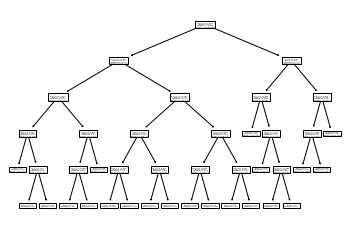

In [242]:
tree.plot_tree(best_estimator)

### 3.3. KNN:

In [243]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [244]:
knn = KNeighborsClassifier()
param_grid_3 = {'n_neighbors':np.arange(1,50)}

clf, best_estimator = find_best_params(knn, param_grid_3, X_train, y_train, X_test, y_test)

The best parameters are {'n_neighbors': 10}
Accuracy score for testing data:  0.8729166666666667
f1 score for testing data:  0.6791971162800889


#### Confusion matrix by best_estimator

Text(0.5, 15.0, 'Predicted label')

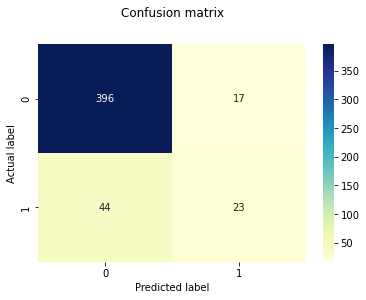

In [245]:
y_pred_tree = best_estimator.predict(X_test)
matrix = confusion_matrix(y_test, y_pred_tree)
p = sb.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<font size="2"> 
True Positive:

Interpretation: You predicted positive and it’s true.

True Negative:

Interpretation: You predicted negative and it’s true.

False Positive: (Type 1 Error)

Interpretation: You predicted positive and it’s false.

False Negative: (Type 2 Error)

Interpretation: You predicted negative and it’s false
</font>

In [133]:
y_test.shape

(480,)

In [246]:
396 + 44 + 17 + 23

480

 
#### Getting score with different values of neighbors in KNN


In [247]:
test_score=[]
train_score=[]
for i in range (1, 50):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [248]:
max_train_score = max(train_score)

In [249]:
max_train_score

1.0

In [250]:
for i in range(len(train_score)):
    if i == max_train_score:
        print("Max train score when the number of neighbors is {}".format(i))

Max train score when the number of neighbors is 1


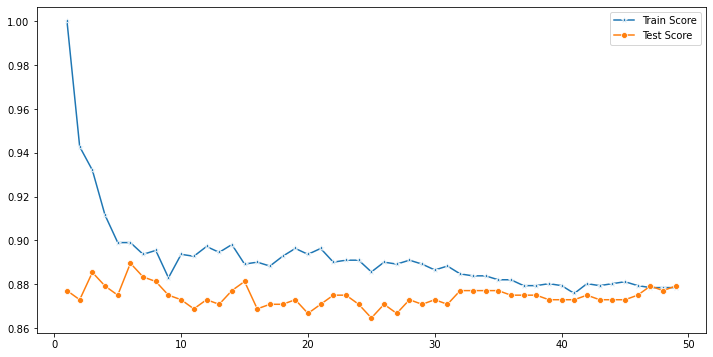

In [251]:
plt.figure(figsize=(12,6))
p=sb.lineplot(range(1,50),train_score,marker="*",label="Train Score")
p=sb.lineplot(range(1,50),test_score,marker="o",label="Test Score")

#### Conclusion
<font size="3"> 
When the number of neighbors is 1, the KNN tends to closely follow the training data and thus shows a high training score. This is because the closest point to any training data point is itself. However, in comparison, the test score is quite low, thus indicating overfitting.
</font>

### 3.4. Linear Regression:

In [252]:
from sklearn.linear_model import LinearRegression

In [253]:
lm = LinearRegression()

In [254]:
clf_lm = lm.fit(X_train, y_train)


In [255]:
clf_lm.score(X_test, y_test)

0.24256807146103043

#### Conclusion
<font size="3"> 
The score of training this model using Linear Regression is very low, it means that Linear Regression is not good for training data in binary classification
</font>

In [256]:
X_train

array([[ 1.72830746, -0.94739106,  2.04627852, ..., -0.73807619,
        -0.71883551,  1.36156659],
       [-0.33533406,  0.17059533, -0.34573993, ...,  1.06789048,
        -0.20280497, -1.05084572],
       [ 0.75381007,  0.05879669,  0.79826889, ..., -0.73807619,
         0.31322556,  0.89764115],
       ...,
       [-0.27801069,  1.59602797, -1.33374755, ...,  0.42290238,
        -0.20280497,  0.34093061],
       [ 1.72830746, -0.94739106,  2.04627852, ..., -0.73807619,
        -0.71883551,  1.36156659],
       [ 0.12325294, -1.05918969,  0.9022697 , ...,  1.32588572,
        -0.14546824,  0.24814553]])